#  **Inference** 

In [69]:
# loading the weights with ~96% acc
from keras.models import load_model
model = load_model('/kaggle/working/weights.best.hdf5')

In [70]:
# Visualizing the mapping of labels
test_set.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [75]:
# Confusion Matrix and Classification report
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        figsize=(10, 10),
                        cmap=plt.cm.Blues):
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=60)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


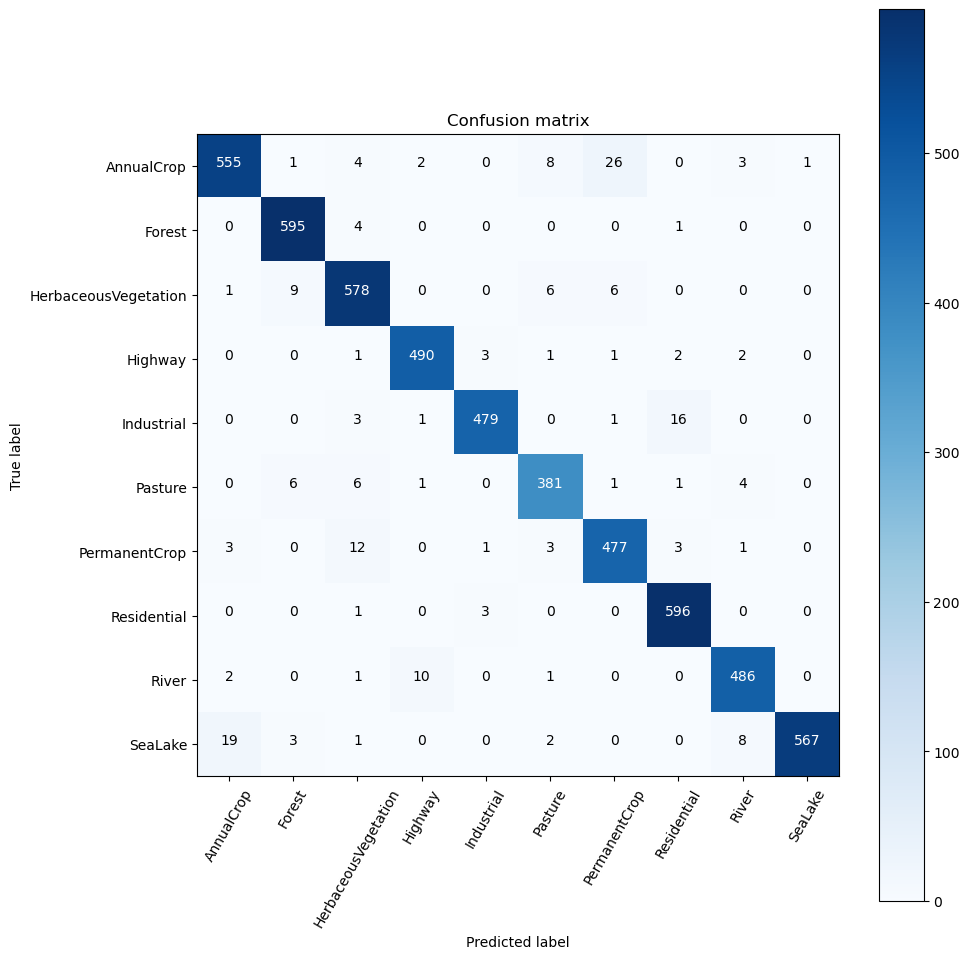

In [76]:
plot_confusion_matrix(cm, train_set.class_indices, cmap='Blues')


In [77]:
print('Classification Report')
target_names = ['AnnualCrop','Forest', 'HerbaceousVegetation', 'Highway',"Industrial", 'Pasture', 'PermanentCrop','Residential', 'River', 'SeaLake']
classifcn_report = classification_report(test_set.classes, y_pred, target_names=target_names)
print(classifcn_report)

Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.96      0.93      0.94       600
              Forest       0.97      0.99      0.98       600
HerbaceousVegetation       0.95      0.96      0.95       600
             Highway       0.97      0.98      0.98       500
          Industrial       0.99      0.96      0.97       500
             Pasture       0.95      0.95      0.95       400
       PermanentCrop       0.93      0.95      0.94       500
         Residential       0.96      0.99      0.98       600
               River       0.96      0.97      0.97       500
             SeaLake       1.00      0.94      0.97       600

            accuracy                           0.96      5400
           macro avg       0.96      0.96      0.96      5400
        weighted avg       0.96      0.96      0.96      5400



In [78]:
# Getting predictions for 20 sample images from test data
class_names = list(test_set.class_indices.keys())
predictions = model.predict(test_set, steps=1)
filenames = test_set.filenames
predicted_class_indices = np.argmax(predictions,axis=1)
classnames = []
for i in range(20):
    print(f"Actual: {filenames[i]},\nPredicted:{class_names[predicted_class_indices.item(i)]}\n")
    

1/1 [==============================] - 0s 79ms/step
Actual: AnnualCrop/AnnualCrop_1.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_10.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_100.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1000.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1001.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1002.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1003.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1004.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1005.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1006.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1007.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1008.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_1009.jpg,
Predicted:AnnualCrop

Actual: AnnualCrop/AnnualCrop_101.jpg,
Predicted:Highway

Actual: AnnualCrop/AnnualCrop_1010.jpg,
Predicted:PermanentCrop

Actual: AnnualCrop/Annual